# Домашнее задание «Проблема качества данных»

Цель: применить на практике методы по оценке качества данных.

## 1) Получение и загрузка данных

Для выполнения данного задания загрузим данные из предоставленного файла: `train.csv`

In [16]:
import pandas as pd
df = pd.read_csv('train.csv')

# выведем ограниченное колличество строк (5) 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2) Работа с данными

На этом этапе мы удалим все пропущенные значения и категориальные переменные, для чего используем `dropna()` для удаления строк содержащих пропущенные значения, а для удаления категориальных признаков воспользуемся `select_dtypes`, который позволит исключить строчные данные.

In [17]:
# удаление пропущенных значений и категориальных переменных
df_clean = df.dropna().select_dtypes(exclude=['object'])

df_clean

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542
872,873,0,1,33.0,0,0,5.0000
879,880,1,1,56.0,0,1,83.1583
887,888,1,1,19.0,0,0,30.0000


Проведем дальнейшую работу с полученным датафреймом, а именно: разделим данные на целевую переменную (столбец: `Survived`) и признаки (остальные столбцы); затем разделим данные на обучающую и тестовую выборки.

In [18]:
# целевая переменная и признаки
# признаки, путем удаления столбца Survived
X = df_clean.drop('Survived', axis=1)
# целевая переменная сохранение столбца Survived
y = df_clean['Survived']

# разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3) Обучение модели логистической регрессии

На основе подготовленных данных проведем работу по обучению модели логистической регрессии, В функции LogisticRegression используем параметр `solver='liblinear'`, значение `liblinear` выбираем потому что оно наиболее удачно подходит для двухклассовой классификации, а также используется для относительно малых объемов данных.

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Далее проведем оценку качества модели используя `accuracy_score`:

In [20]:
# оценка качества модели
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


## 4) Проводим повторную загрузку данных

In [34]:
df2 = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 5) Удаление ненужных признаков

На данном этапе удалим признаки, которые не имеют смысла для построения модели. Например, такие признаки как PassengerId, Name, Ticket и Cabin не имеют прямой связи с выживанием.

- PassengerId — идентификационный номер пассажира, не влияет на выживание.
- Name — имя пассажира, не влияет напрямую на выживание.
- Ticket — номер билета, не влияет на выживание.
- Cabin — много пропущенных значений, не особо информативен.
    
Для очискти датафрейма от ненужных признаков которые мы определелили воспользуемся .drop()

In [35]:
df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 6) Проверка данных на наличие пропущенных значений

In [36]:
# процент пропущенных значений
missing_values = df2.isnull().sum()

percent_missing = missing_values / len(df) * 100

print(percent_missing)

# удаление всех строк с пропусками
df_no_missing = df2.dropna()

print(f'Доля данных, которые будут потеряны: {(len(df2) - len(df_no_missing)) / len(df2) * 100}%')

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64
Доля данных, которые будут потеряны: 20.089786756453424%


Кратко охарактеризуем написанный код выше. 
- `df2.isnull()` — проверяет каждую ячейку DataFrame на наличие пропущенных значений (возвращает True для пропусков и False для других значений).
- `sum()` — считает количество True для каждого столбца, то есть количество пропущенных значений.
- `missing_values` — это количество пропущенных значений в каждом столбце.
- `len(df2)` — общее количество строк в DataFrame.
- `missing_values / len(df2) * 100` — вычисляет процент пропусков для каждого столбца. Это соотношение числа пропущенных значений к общему числу строк, умноженное на 100 для перевода в проценты.


- `len(df2)` — общее количество строк в исходном DataFrame.
- `len(df_no_missing)` — количество строк в DataFrame, из которого были удалены строки с пропусками.
- `(len(df2) - len(df_no_missing)) / len(df2) * 100` — вычисляет процент строк, которые были удалены из-за наличия пропущенных значений. Этот процент — это доля данных, которая будет потеряна после удаления строк с пропусками.

__Заполним пропуски:__

Пропуски в возрасте (Age) можно заполнить средним значением. Пропуски в порту посадки (Embarked) можно заполнить модой или константой.

In [37]:
# заполнение пропусков
df2['Age'].fillna(df['Age'].mean(), inplace=True)

df2['Embarked'].fillna('Unknown', inplace=True)

df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


## 7) Преобразуем категориальные переменные

Для того чтобы обучить модель, необходимо преобразовать категориальные переменные в числовые. Это можно сделать с помощью метода `pd.get_dummies`

In [38]:
# преобразование категориальных переменных
df2 = pd.get_dummies(df2, columns=['Sex', 'Embarked'], drop_first=True)

df2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_Unknown
0,0,3,22.000000,1,0,7.2500,True,False,True,False
1,1,1,38.000000,1,0,71.2833,False,False,False,False
2,1,3,26.000000,0,0,7.9250,False,False,True,False
3,1,1,35.000000,1,0,53.1000,False,False,True,False
4,0,3,35.000000,0,0,8.0500,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,True,False
887,1,1,19.000000,0,0,30.0000,False,False,True,False
888,0,3,29.699118,1,2,23.4500,False,False,True,False
889,1,1,26.000000,0,0,30.0000,True,False,False,False


## 8) Проведем проверку на наличие выбросов

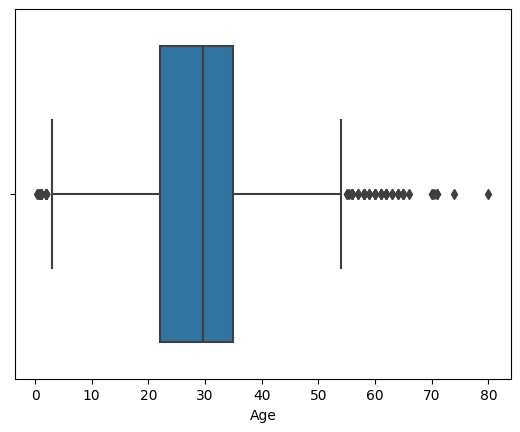

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# построение boxplot для поиска выбросов в Age
sns.boxplot(x=df2['Age'])
plt.show()

На графике видны выбросы, напишем код, который позволит определить границы для удаления выбросов. 

In [41]:
# решение по удалению выбросов
Q1 = df2['Age'].quantile(0.25)
Q3 = df2['Age'].quantile(0.75)
IQR = Q3 - Q1 # диапазон нормальных данных
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# удаление выбросов
df_no_outliers = df2[(df2['Age'] >= lower_bound) & (df2['Age'] <= upper_bound)]

## 9) Повторное обучение модели 

In [42]:
# целевая переменная и признаки
X2 = df_no_outliers.drop('Survived', axis=1)
y2 = df_no_outliers['Survived']

# разделение данных на обучающую и тестовую выборки
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# обучение модели логистической регрессии
model2 = LogisticRegression(max_iter=1000, solver='liblinear')

model2.fit(X_train2, y_train2)

# оценка качества модели
y_pred2 = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Accuracy после очистки: {accuracy2:.2f}')

Accuracy после очистки: 0.80


## 10) Выводы

__Были выполнены следующие преобразования:__
- Удалены ненужные признаки (PassengerId, Name, Ticket, Cabin).
- Заполнены пропуски в данных средними значениями и константами.
- Преобразованы категориальные переменные.
- Удалены выбросы.

__Сравнение метрик:__
- Метрика качества модели в первом варианте: 0.68
- Метрика качества модели во втором варианте: 0.8

__Работа с данными необходима для повышения качества модели. Чистка и предобработка данных могут существенно улучшить результаты, как это было показано на примере данного задания.__